# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build query URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url


In [4]:
#response = requests.get(query_url + city)
#print(response.url)

In [5]:
#response_json= response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

In [6]:
#list(response_json.values())

In [7]:
#Create Url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{url}&units={units}&appid={api_key}"

#Empty lists to hold response info
city_list = [] 

# Print Header
print("Beginning Data Retrieval     ")
print("-----------------------------")


#Call Counter
i = 1

# Loop through the list of cities generated with citipy and perform a request for data on each
for city in cities:
    
    city_url = query_url + "&q=" + city
    
    print(f'Processing record {i} | {city}')   
    #increase counter
    i = i + 1

    try: 
        
        weather_data = requests.get(city_url).json()
        #parse data and create variables to hold weather info 
        #city = weather_data['name']
        clouds = weather_data['clouds']['all']      
        country= weather_data['sys']['country']       
        date= weather_data['dt']
        humidity= weather_data['main']['humidity']     
        lat= weather_data['coord']['lat']        
        lng= weather_data['coord']['lat']         
        max_temp= weather_data['main']['temp_max']  
        wind_speed= weather_data['wind']['speed']
    
        #create a dictionary for df
        city_list.append({"City": city,
                         "Cloudiness": clouds,
                         "Country": country,
                         "Date":date, 
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng, 
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
    except KeyError:
        print(f'City {city} not found. Skipping...')
    continue
 
print("-----------------------------")
print("Data Retrieval Complete      ")
    


Beginning Data Retrieval     
-----------------------------
Processing record 1 | putnam
Processing record 2 | dikson
Processing record 3 | coulihaut
City coulihaut not found. Skipping...
Processing record 4 | saint anthony
Processing record 5 | butaritari
Processing record 6 | bethel
Processing record 7 | monrovia
Processing record 8 | ushuaia
Processing record 9 | hithadhoo
Processing record 10 | cabo san lucas
Processing record 11 | kinablangan
Processing record 12 | nizhneyansk
City nizhneyansk not found. Skipping...
Processing record 13 | teahupoo
Processing record 14 | port alfred
Processing record 15 | dingle
Processing record 16 | hermanus
Processing record 17 | taolanaro
City taolanaro not found. Skipping...
Processing record 18 | barentsburg
City barentsburg not found. Skipping...
Processing record 19 | mahebourg
Processing record 20 | rikitea
Processing record 21 | trairi
Processing record 22 | morondava
Processing record 23 | bengkulu
City bengkulu not found. Skipping...
Pr

City maloshuyka not found. Skipping...
Processing record 216 | ahipara
Processing record 217 | maldonado
Processing record 218 | port elizabeth
Processing record 219 | ossora
Processing record 220 | sumbawa
City sumbawa not found. Skipping...
Processing record 221 | marawi
Processing record 222 | moussoro
Processing record 223 | sinjah
City sinjah not found. Skipping...
Processing record 224 | markala
Processing record 225 | toftir
City toftir not found. Skipping...
Processing record 226 | talnakh
Processing record 227 | longyearbyen
Processing record 228 | vanino
Processing record 229 | ostrovnoy
Processing record 230 | nhulunbuy
Processing record 231 | stoughton
Processing record 232 | baracoa
Processing record 233 | ucluelet
Processing record 234 | san carlos de bariloche
Processing record 235 | biak
Processing record 236 | yangambi
Processing record 237 | pirgos
Processing record 238 | gedo
Processing record 239 | praia da vitoria
Processing record 240 | japura
Processing record 24

Processing record 432 | bonavista
Processing record 433 | mpika
Processing record 434 | natalio
Processing record 435 | narayanganj
Processing record 436 | tomohon
Processing record 437 | bairnsdale
Processing record 438 | szecseny
Processing record 439 | sitka
Processing record 440 | dalmatovo
Processing record 441 | port blair
Processing record 442 | kamaishi
Processing record 443 | kotma
Processing record 444 | chatsu
City chatsu not found. Skipping...
Processing record 445 | anloga
Processing record 446 | mizan teferi
Processing record 447 | bonthe
Processing record 448 | kamenskoye
City kamenskoye not found. Skipping...
Processing record 449 | sorland
Processing record 450 | wladyslawowo
Processing record 451 | santa maria
Processing record 452 | venado tuerto
Processing record 453 | siocon
Processing record 454 | ahuimanu
Processing record 455 | gigmoto
Processing record 456 | amapa
Processing record 457 | inhambane
Processing record 458 | ust-karsk
Processing record 459 | sterli

In [45]:
#Create Data frame from dictionary
city_weather_data = pd.DataFrame(city_list)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
city_weather_data.to_csv('output_data/city_weather_data.csv')

In [20]:
city_weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [25]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,putnam,90,US,1553323565,79,41.92,41.92,35.01,21.92
1,dikson,48,RU,1553323566,100,73.51,73.51,3.42,20.29
2,saint anthony,90,US,1553323237,100,43.97,43.97,39.20,4.70
3,butaritari,92,KI,1553323567,100,3.07,3.07,77.49,3.96
4,bethel,90,US,1553320560,86,60.79,60.79,39.20,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

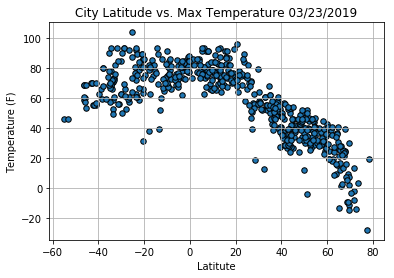

In [43]:
date = time.strftime("%m/%d/%Y")
plt.scatter(city_weather_data ['Lat'], city_weather_data['Max Temp'], marker="o", 
            edgecolors="black", s=30)

plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel('Latitute')
plt.ylabel('Temperature (F)')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat-vs.Temp-Plot.png")
plt.show()


#### Latitude vs. Humidity Plot

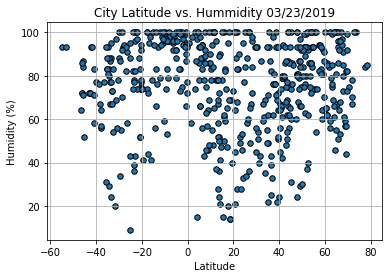

In [49]:
date = time.strftime("%m/%d/%Y")
plt.scatter(city_weather_data ['Lat'], city_weather_data['Humidity'], marker="o", 
            edgecolors="black", s=30)

plt.title(f"City Latitude vs. Hummidity {date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat-vs.Humm-Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

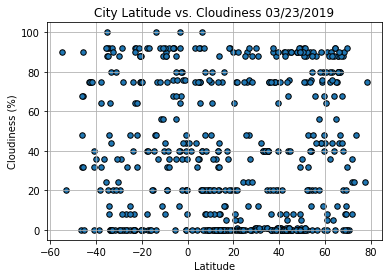

In [51]:
date = time.strftime("%m/%d/%Y")
plt.scatter(city_weather_data ['Lat'], city_weather_data['Cloudiness'], marker="o", 
            edgecolors="black", s=30)

plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat-vs.Cloud-Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

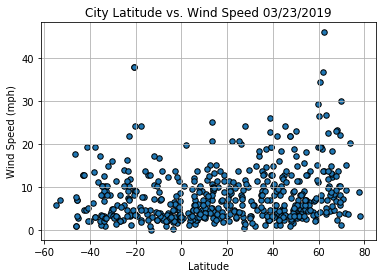

In [52]:
date = time.strftime("%m/%d/%Y")
plt.scatter(city_weather_data ['Lat'], city_weather_data['Wind Speed'], marker="o", 
            edgecolors="black", s=30)

plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat-vs.Wind-Plot.png")
plt.show()

# Conclusions
Temperature is higher in cities below latitude 0 and lower in cities above latitude 0.

There are more cities with lower humidity in latitude above 0.

There are more cities with wind speed around 20 mph above latitude 0.

